In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv(r"C:\Users\rohan\Desktop\Red_wine__(1).csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [33]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [34]:
df.isna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
df[['total sulfur dioxide']].isna()

,total sulfur dioxide
0,False
1,False
2,False
3,False
4,False
...,...
1594,False
1595,False
1596,False
1597,False


In [36]:
df[df['total sulfur dioxide'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.8,10.5,5.0


In [37]:
df.groupby(['sulphates','free sulfur dioxide'])[['total sulfur dioxide']].count().rename(columns = {'total sulfur dioxide' :'count' })

count
sulphates free sulfur dioxide       
0.33      4.0                      1
0.37      3.0                      1
          4.0                      1
0.39      4.0                      2
          7.0                      2
...                              ...
1.61      27.0                     1
1.62      36.0                     1
1.95      20.0                     2
1.98      19.0                     1
2.00      32.0                     1

[867 rows x 1 columns]

In [38]:
def fill(x):
    return x.fillna(x.mean())

df['total sulfur dioxide'] = (
    df.groupby(['sulphates', 'free sulfur dioxide'])['total sulfur dioxide']
    .transform(lambda x: x.fillna(x.mean()))
)

# Convert 'total sulfur dioxide' column to float
df['total sulfur dioxide'] = df['total sulfur dioxide'].astype(float)

In [39]:
df.iloc[[9]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,62.666667,0.9978,3.35,0.8,10.5,5.0


In [40]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()


0

In [41]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

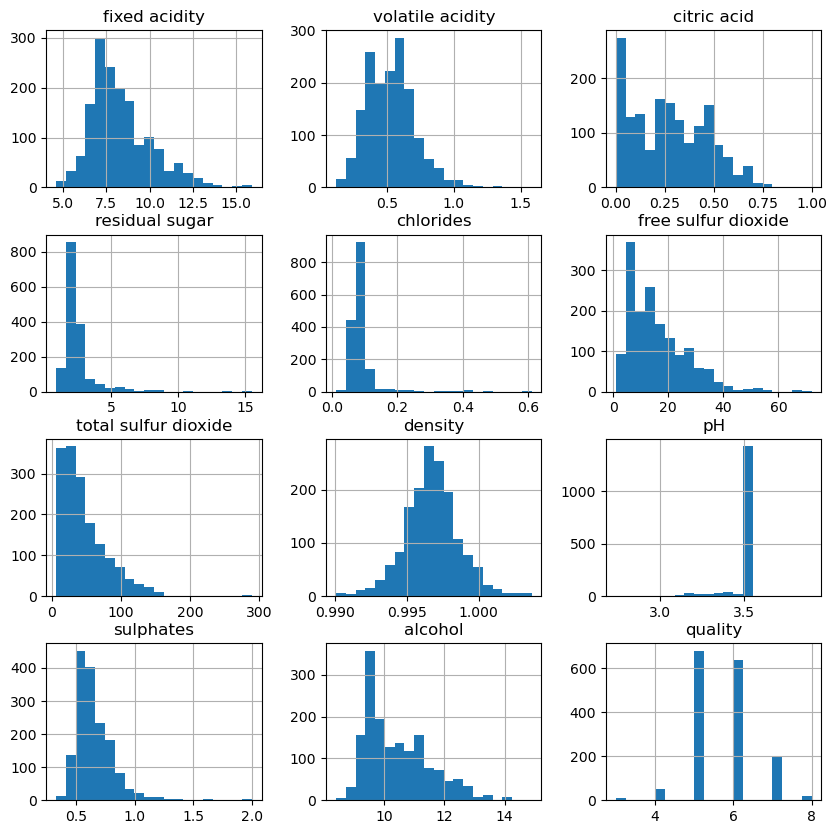

In [42]:
df.hist(bins=20, figsize=(10, 10))
plt.show()


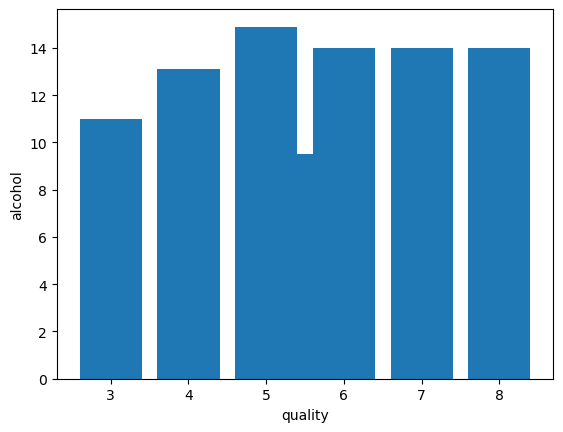

In [43]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


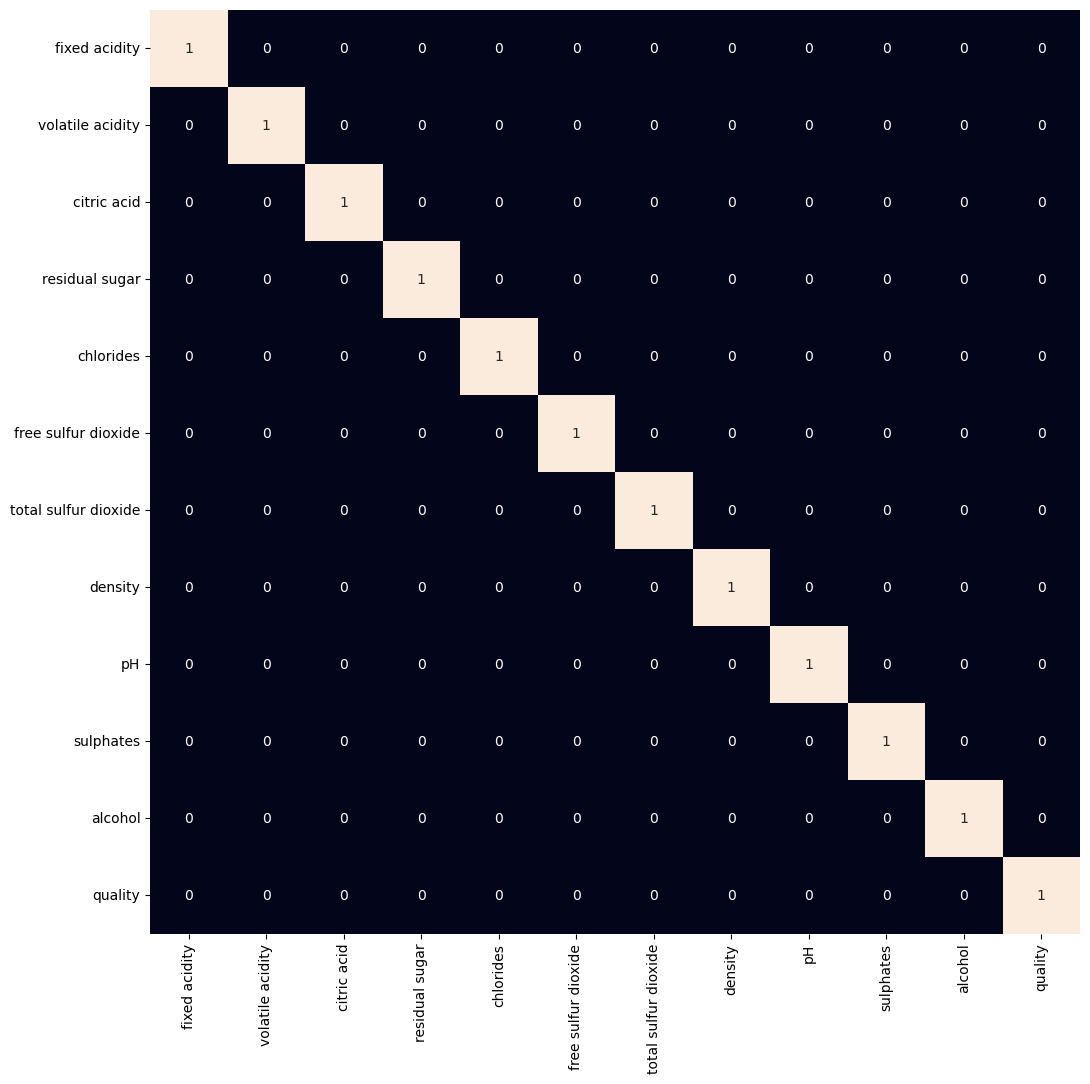

In [44]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()


In [45]:
df = df.drop('total sulfur dioxide', axis=1)


In [46]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]


In [47]:
df.replace({'white': 1, 'red': 0}, inplace=True)


In [48]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
	features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape


((1279, 10), (320, 10))

In [49]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)


In [50]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for i in range(3):
    models[i].fit(xtrain, ytrain)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        ytest, models[i].predict(xtest)))
    print()


LogisticRegression() : 
Training Accuracy :  0.7310879263415448
Validation Accuracy :  0.7711257913570052

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.8238370492705752

SVC() : 
Training Accuracy :  0.7636832175459629
Validation Accu

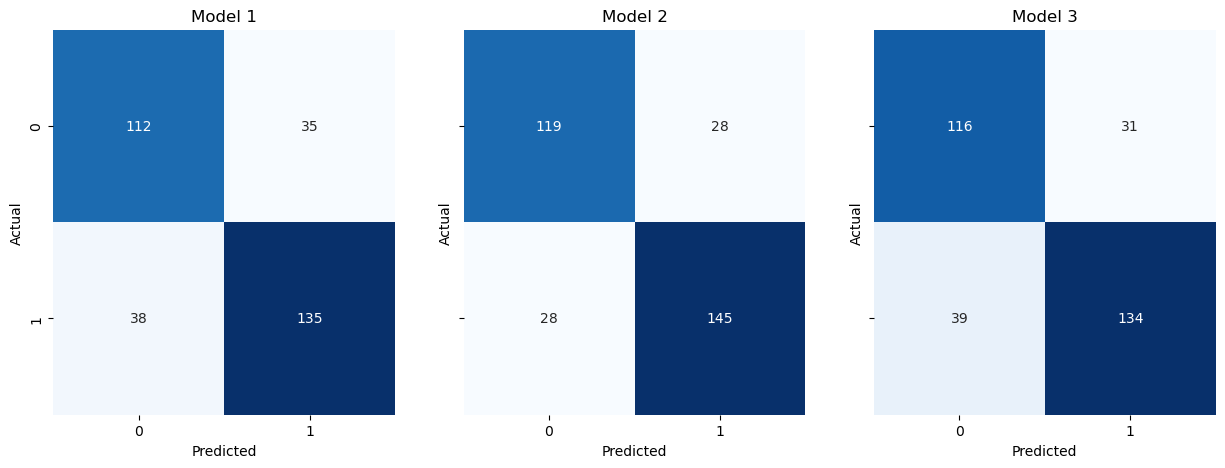

In [54]:
y_pred_list = [model.predict(xtest) for model in models]

# Computing the confusion matrix for each model
cm_list = [confusion_matrix(ytest, y_pred) for y_pred in y_pred_list]

# Visualizing the confusion matrix for each model
fig, axes = plt.subplots(1, len(models), figsize=(15, 5), sharey=True)
for i, (model, cm) in enumerate(zip(models, cm_list)):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"Model {i+1}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.show()


In [56]:
print(metrics.classification_report(ytest,
    models[1].predict(xtest)))


              precision    recall  f1-score   support

           0       0.81      0.81      0.81       147
           1       0.84      0.84      0.84       173

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



In [57]:
print(metrics.classification_report(ytest,
    models[2].predict(xtest)))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       147
           1       0.81      0.77      0.79       173

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



In [59]:
print(metrics.classification_report(ytest,
    models[0].predict(xtest)))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       147
           1       0.79      0.78      0.79       173

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320

